In [2]:
library(DT)
library(patchwork)
library(igraph)
library(dplyr)
library(ggalluvial)
library(CellChat)
library(Seurat)
library(SeuratDisk)
library(patchwork)
library(pheatmap)

library(Seurat)

library(dplyr)
library(ggplot2)
library(dior)
library(Matrix)
library(rhdf5)
library(reticulate)
suppressWarnings(suppressMessages(future::plan("multiprocess", workers = 8)))

In [45]:
ad <- import("anndata", convert = FALSE)
ad_object <- ad$read_h5ad("../data/v4-af.h5ad")

data.input <- t(py_to_r(ad_object$X))
rownames(data.input) <- rownames(py_to_r(ad_object$var))
colnames(data.input) <- rownames(py_to_r(ad_object$obs))
# access meta data
meta.data <- py_to_r(ad_object$obs)
meta <- meta.data
cellchat <- createCellChat(object = as.matrix(data.input), meta = meta, group.by = "leiden_poly")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Fib1 Fib2 Fib3 Macro1 Macro2 Macro3 


In [46]:
ad_object

AnnData object with n_obs × n_vars = 23432 × 30901
    obs: 'sample', 'sample_batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample_group', 'new_cls', 'leiden_poly'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [47]:
cellchat <- addMeta(cellchat, meta = meta)

In [48]:
cellchat <- setIdent(cellchat, ident.use = "leiden_poly") # set "labels" as default cell identity
# levels(cellchat@idents) # show factor levels of the cell labels
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
# showDatabaseCategory(CellChatDB)
# ggsave(filename = './figures/cellchat/showadatabase.pdf', width = 10, height = 10)

In [49]:
# CellChatDB.use <- subsetDB(CellChatDB, search = "Cell-Cell Contact") 

In [50]:
cellchat@DB <- CellChatDB

In [51]:
cellchat <- subsetData(cellchat)
future::plan("multiprocess", workers = 8) 

In [52]:
cellchat <- identifyOverExpressedGenes(cellchat)

In [53]:
cellchat <- identifyOverExpressedInteractions(cellchat)

In [54]:
#project gene expression data onto PPI (Optional: when running it, USER 
#should set `raw.use = FALSE` in the function `computeCommunProb()` in order to use the projected data)
# cellchat <- projectData(cellchat, PPI.human)

In [55]:
cellchat <- computeCommunProb(cellchat)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-05-17 16:46:59]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-05-17 16:49:33]"


In [56]:

# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 100)

In [57]:
dim(cellchat@netP$pathways)

NULL

In [58]:
cellchat <- computeCommunProbPathway(cellchat)

In [59]:
cellchat <- aggregateNet(cellchat)

In [60]:
groupSize <- as.numeric(table(cellchat@idents))

In [61]:
groupSize

[1] 14361  1558   244  3731  2643   895

In [62]:
edit(netVisual_circle)

ERROR: Error in edit(netVisual_circle): ‘edit()’ not yet supported in the Jupyter R kernel


In [ ]:
write.table(file = '123.csv', cellchat@net$count, sep = ',')

In [ ]:
?netVisual_circle

In [66]:
pdf('./figures/cellchat/Number of interactions——af.pdf', width = 10, height = 10)
netVisual_circle(cellchat@net$count, vertex.weight = groupSize,title.name = "Number of interactions",
                    margin =0.2,alpha.edge=0.5,   edge.width.max = 0.2,vertex.label.color = "transparent"
                )
dev.off()

ERROR while rich displaying an object: Error in file(con, "rb"): 无法打开链结

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_png.recordedplot(obj)
8. repr_recordedplot_generic(obj, ".png", TRUE

plot without title

pdf 
  4

ERROR while rich displaying an object: Error in file(con, "rb"): 无法打开链结

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_svg.recordedplot(obj)
8. repr_recordedplot_generic(obj, ".svg", FALS

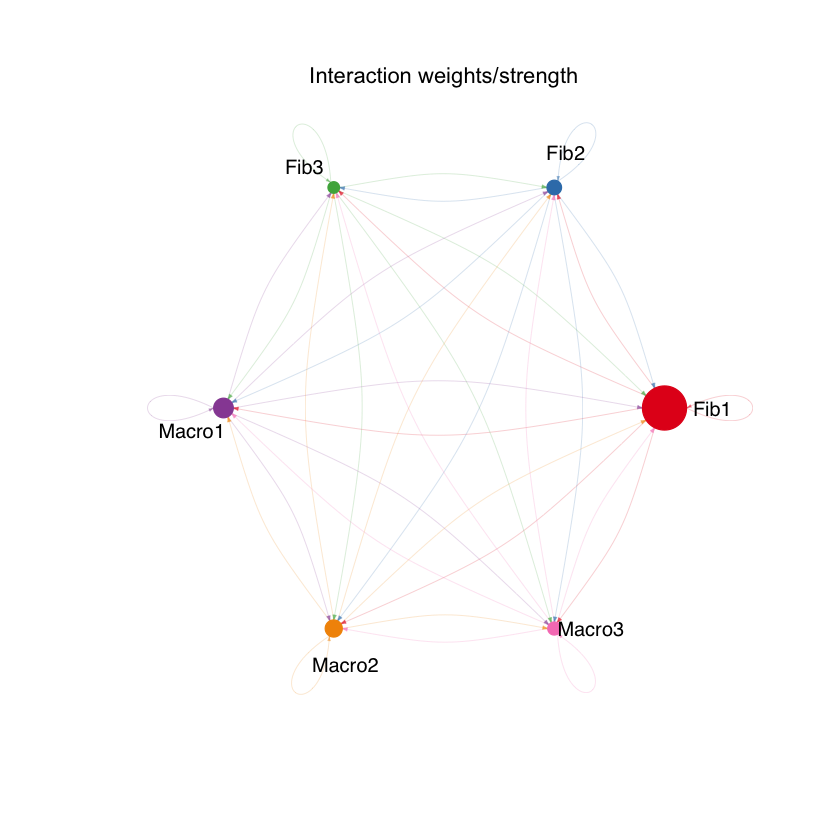

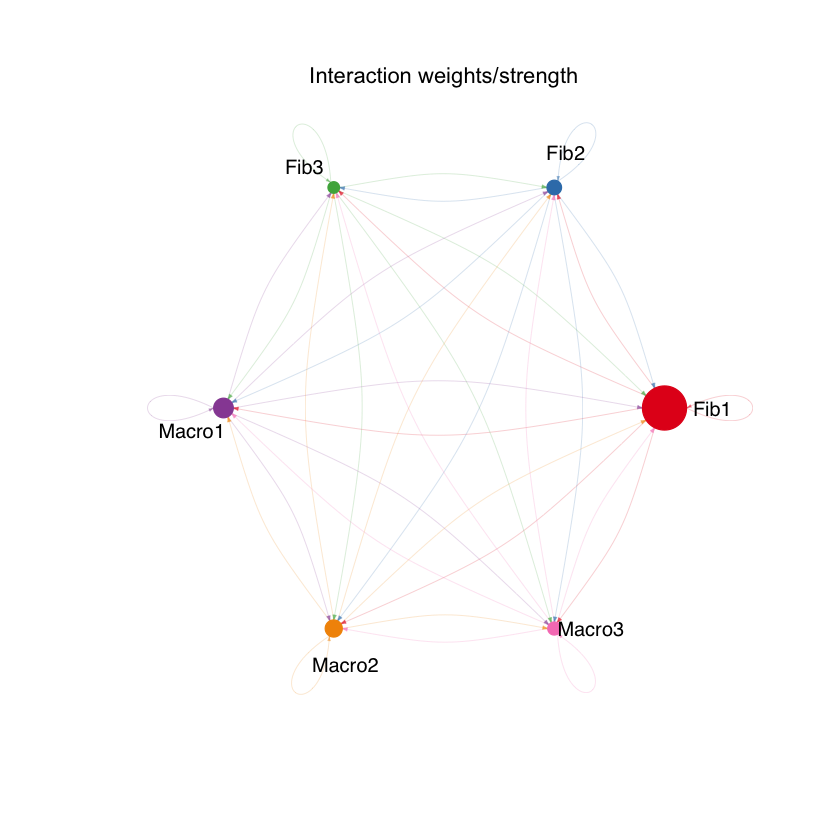

In [30]:
# pdf('./figures/cellchat/Interaction weights.strength_af.pdf', width = 10, height = 10)
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, title.name = "Interaction weights/strength",
                vertex.label.cex=1,margin =0.2,alpha.edge=0.5,    edge.width.max = 1)
# dev.off()

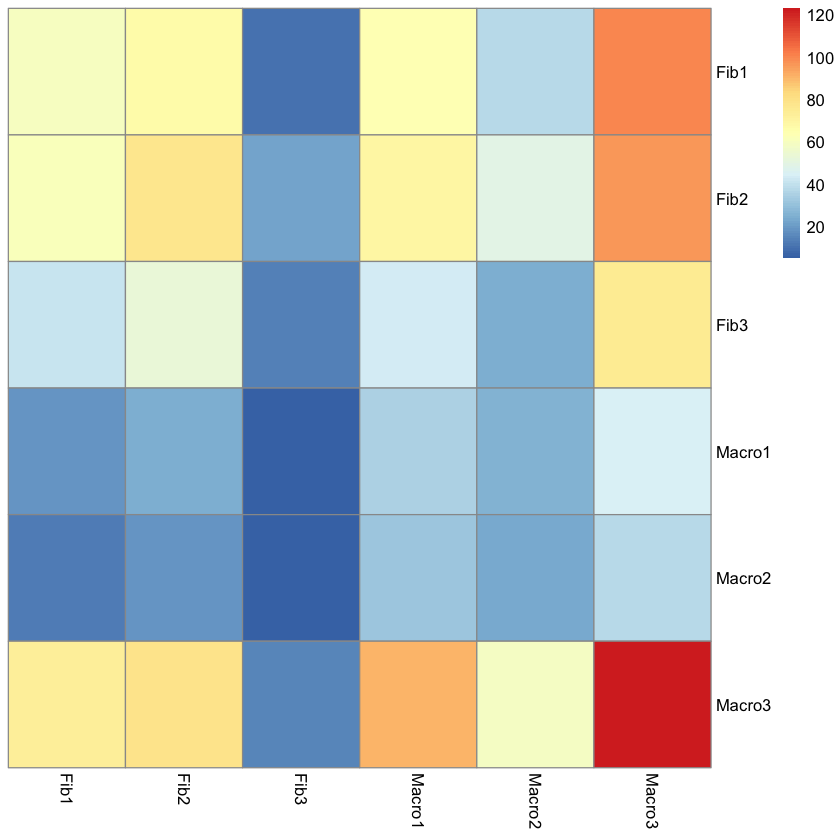

In [21]:
pheatmap(cellchat@net$count, cluster_rows = FALSE, cluster_cols = FALSE)

In [22]:
cellchat@net$count

,Fib1,Fib2,Fib3,Macro1,Macro2,Macro3
Fib1,60,67,10,63,38,100
Fib2,61,78,22,69,49,96
Fib3,41,53,14,43,25,75
Macro1,18,25,5,35,26,45
Macro2,13,18,5,31,23,38
Macro3,73,79,15,90,59,123


In [23]:
write.table(cellchat@net$count, file = './figures/cellchat/net_count_af.csv',sep = '\t')

In [24]:
write.table(cellchat@netP$prob, file = './figures/cellchat/prob-af.csv',sep = '\t')

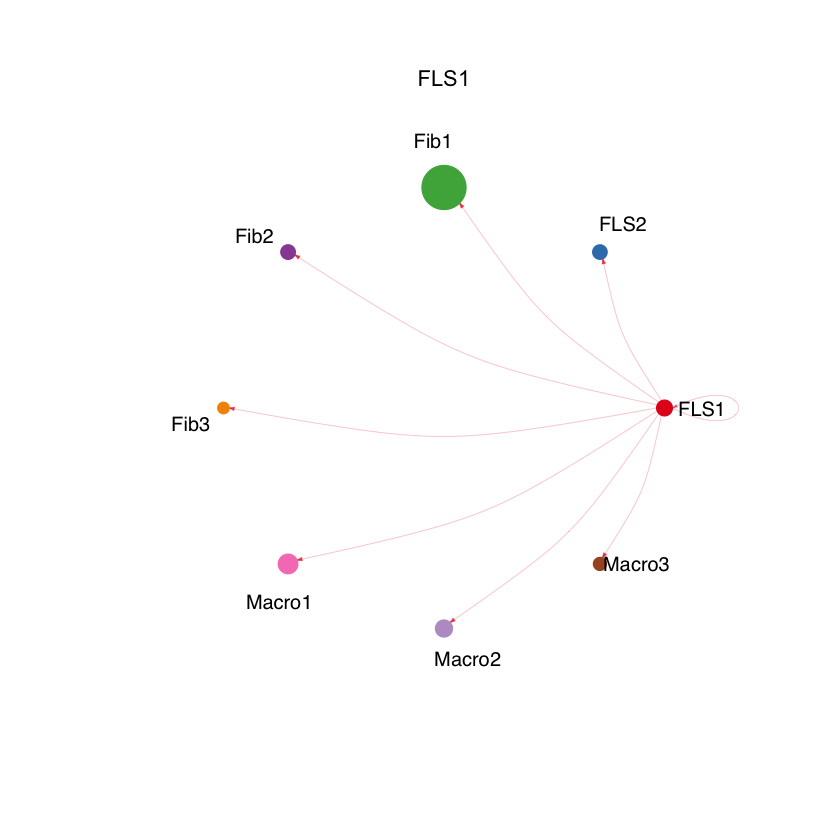

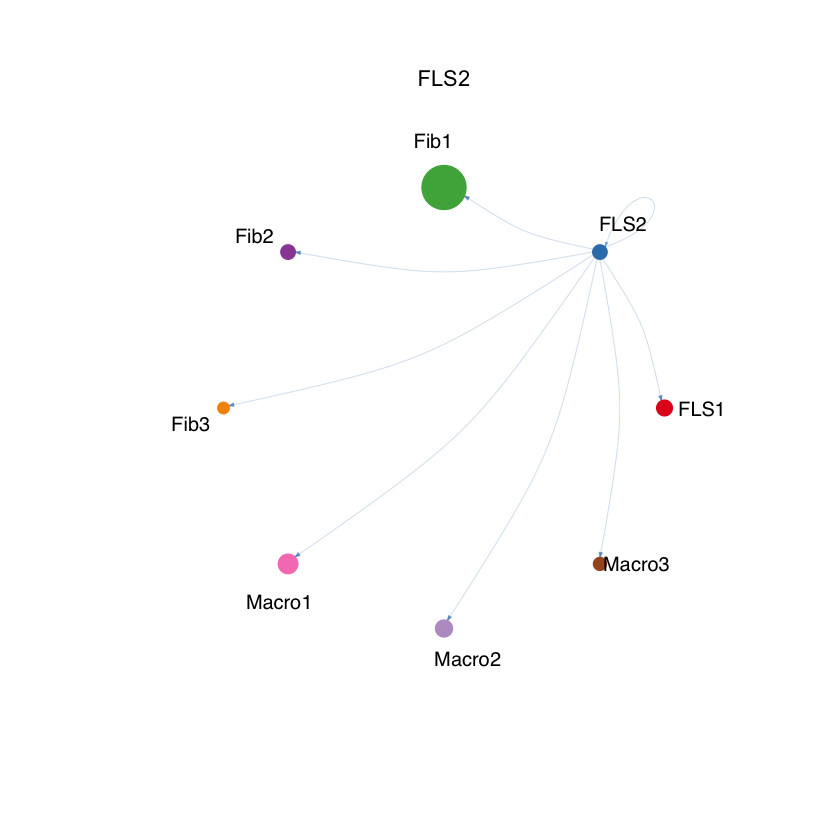

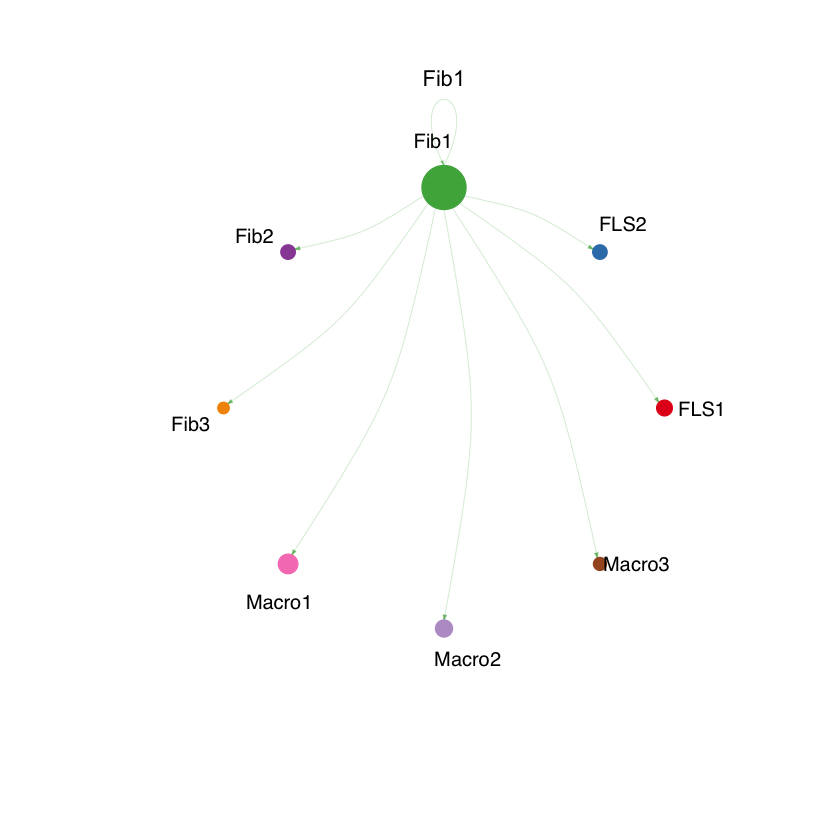

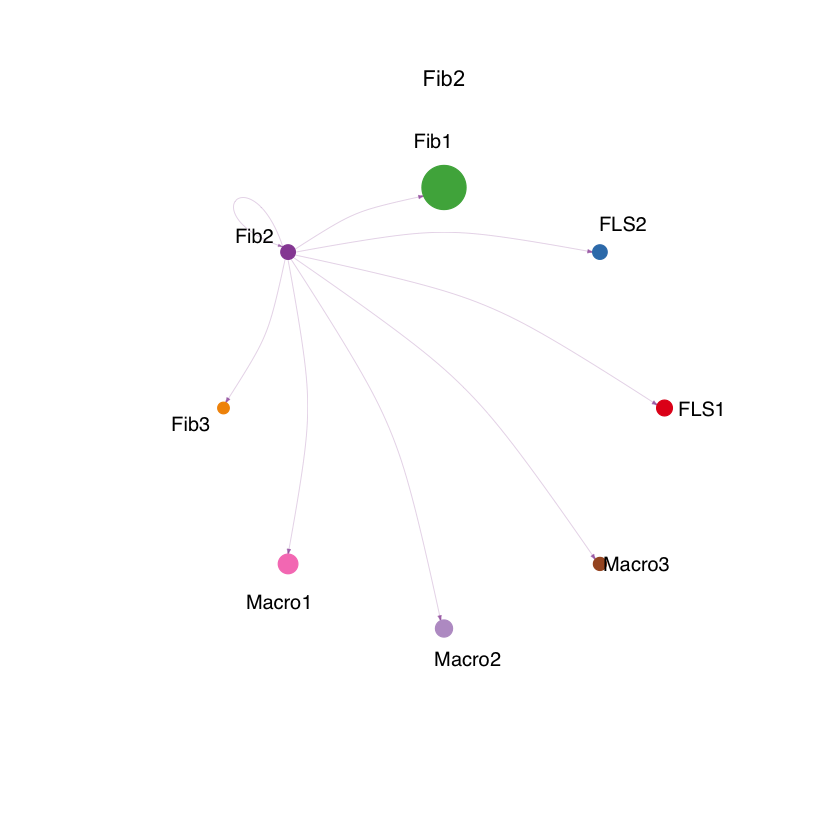

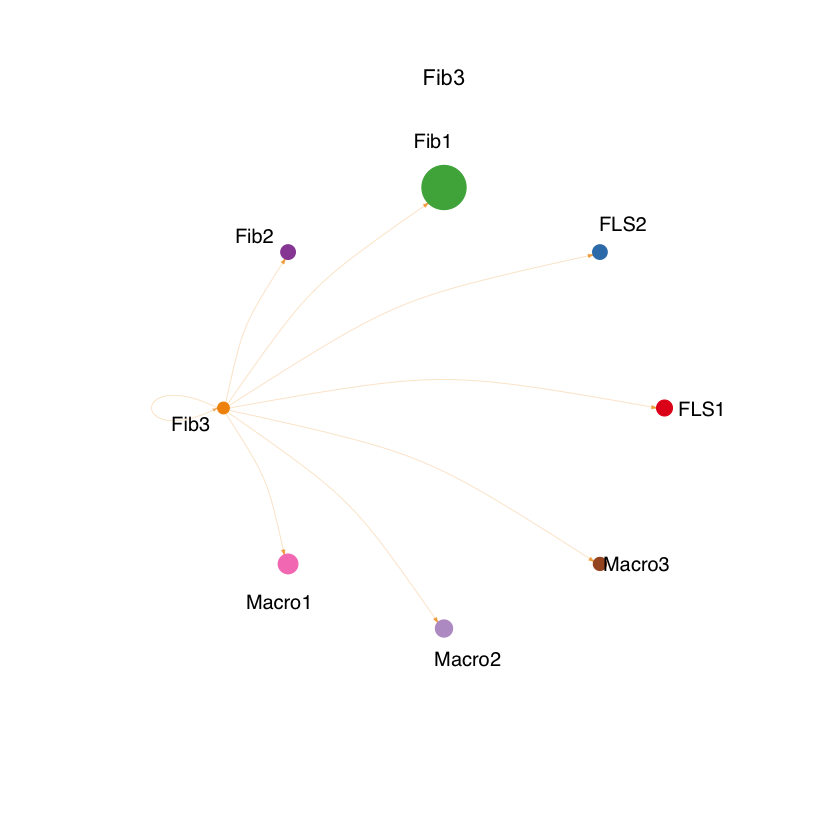

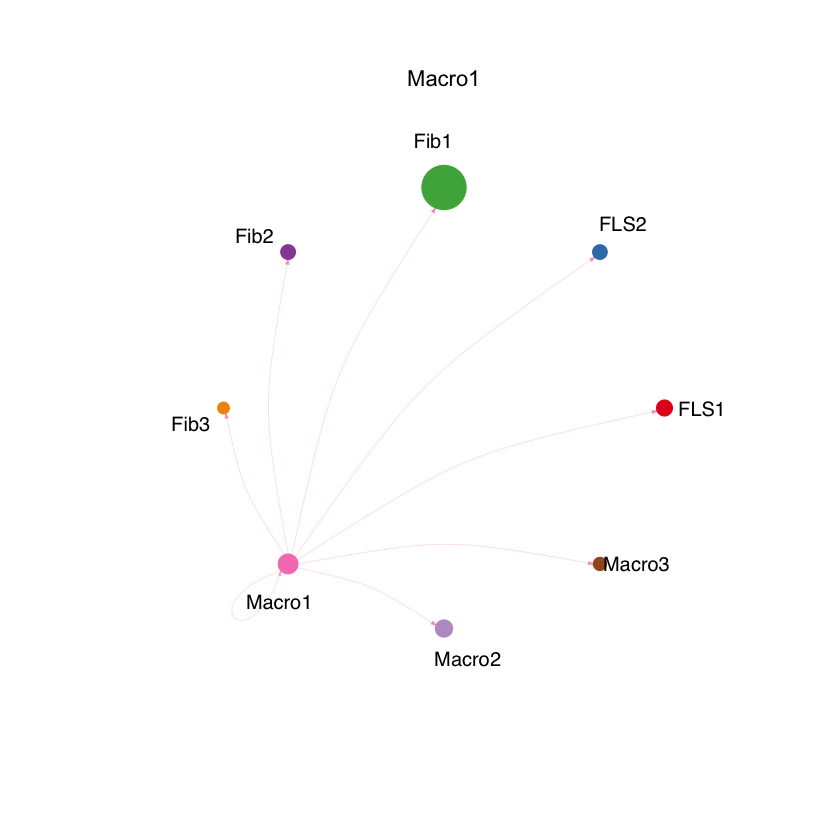

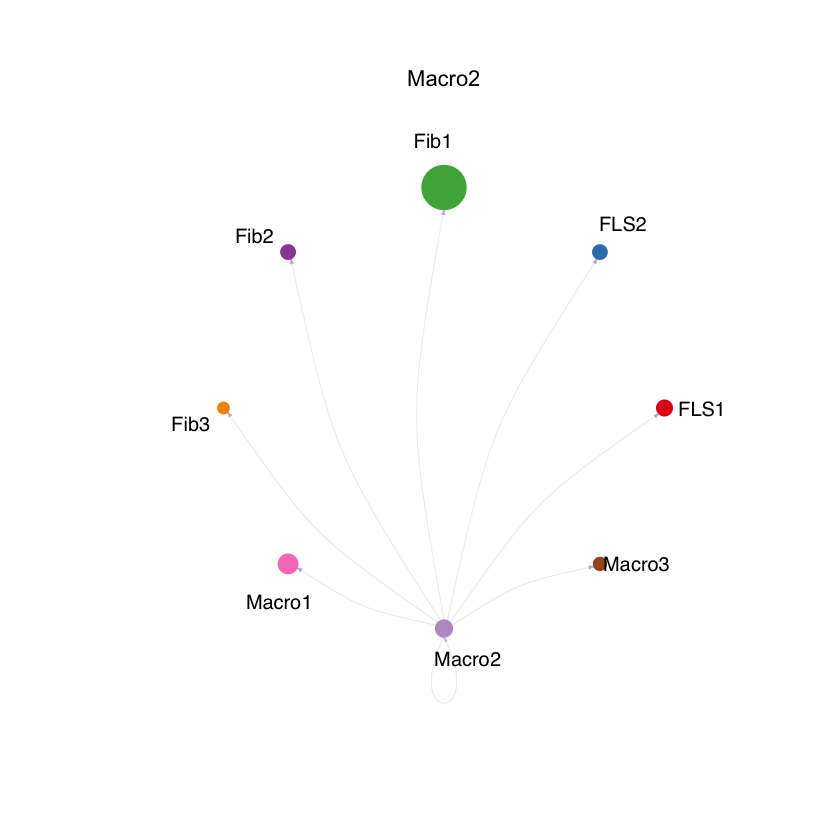

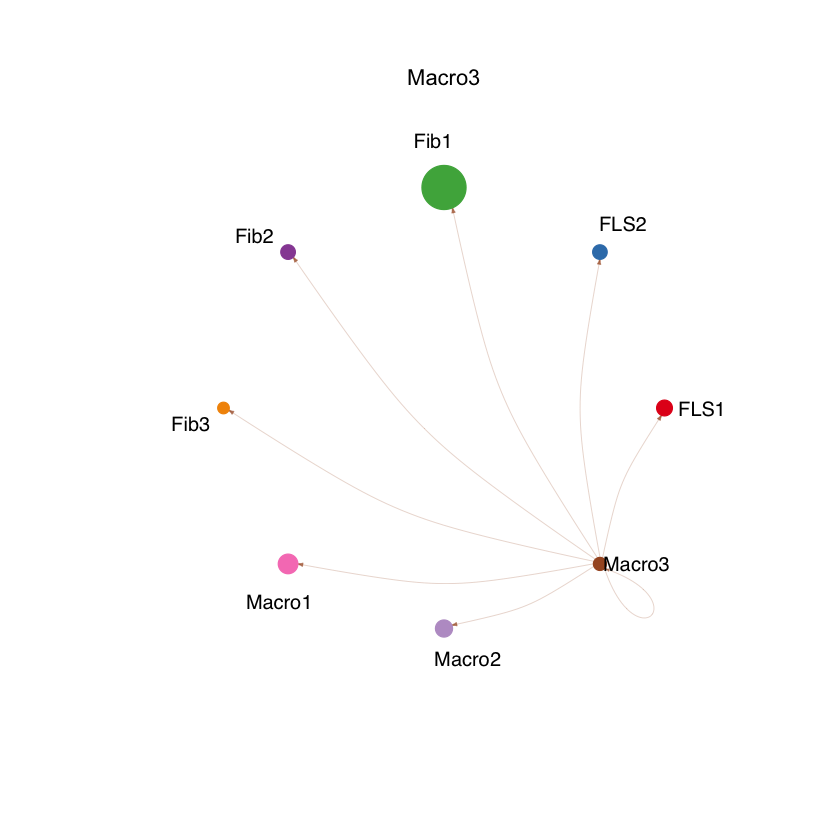

In [102]:
mat <- cellchat@net$weight
par( c(2,2), xpd=TRUE)
for (i in 1:nrow(mat)) {
    mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
    mat2[i, ] <- mat[i, ]
#     name = paste('./figures/cellchat/' ,rownames(mat)[i] ,'isolate_plot_af.pdf')
#     pdf(name, width = 10, height = 10)
    netVisual_circle(mat2, vertex.weight = groupSize,  edge.weight.max = max(mat), title.name = rownames(mat)[i])
#     dev.off()
}

In [42]:
df = cellchat@netP$prob

In [51]:
cellchat@netP$prob

, , COLLAGEN

               Fib1         Fib2         Fib3       Macro1       Macro2
Fib1   3.607449e-04 3.802030e-04 0.000000e+00 3.714705e-04 6.026610e-05
Fib2   1.449225e-03 1.829996e-03 3.824099e-04 1.492149e-03 5.448080e-04
Fib3   3.045663e-05 7.721940e-05 7.748256e-07 3.883808e-05 2.739421e-06
Macro1 6.848558e-07 2.820258e-06 0.000000e+00 0.000000e+00 0.000000e+00
Macro2 1.369712e-07 5.640520e-07 0.000000e+00 0.000000e+00 0.000000e+00
Macro3 3.263120e-04 3.439132e-04 0.000000e+00 3.360147e-04 5.451354e-05
             Macro3
Fib1   6.612045e-04
Fib2   2.655923e-03
Fib3   1.350766e-04
Macro1 6.848558e-07
Macro2 1.369712e-07
Macro3 5.980948e-04

, , FN1

               Fib1         Fib2         Fib3       Macro1       Macro2
Fib1   1.904459e-04 3.179457e-04 0.000000e+00 1.739111e-04 0.000000e+00
Fib2   5.065675e-04 8.456831e-04 5.307278e-05 5.156273e-04 1.313452e-04
Fib3   1.917593e-06 1.140610e-05 0.000000e+00 2.711884e-06 0.000000e+00
Macro1 2.465476e-06 1.466496e-05 0.000000e+00 3.486706e-06 0.000000e+00
Macro2 1.369712e-07 8.147265e-07 0.000000e+00 1.937065e-07 0.000000e+00
Macro3 3.087685e-04 5.154781e-04 0.000000e+00 2.819535e-04 2.287367e-05
             Macro3
Fib1   3.011019e-04
Fib2   8.008313e-04
Fib3   1.917593e-06
Macro1 2.465476e-06
Macro2 1.369712e-07
Macro3 4.881582e-04

, , CD99

               Fib1         Fib2 Fib3       Macro1       Macro2       Macro3
Fib1   8.874947e-05 1.972006e-04    0 7.396391e-06 0.0000000000 1.380493e-04
Fib2   1.947351e-04 4.326464e-04    0 1.893325e-04 0.0001136047 3.028949e-04
Fib3   0.000000e+00 9.587976e-07    0 2.876387e-06 0.0000000000 1.917595e-06
Macro1 0.000000e+00 1.752932e-04    0 6.574575e-06 0.0000000000 1.227122e-04
Macro2 0.000000e+00 1.150429e-04    0 4.314575e-06 0.0000000000 2.876391e-06
Macro3 1.331183e-04 2.957725e-04    0 1.294237e-04 0.0000000000 2.070606e-04

, , MHC-II

       Fib1 Fib2 Fib3       Macro1       Macro2       Macro3
Fib1      0    0    0 0.000000e+00 0.000000e+00 0.000000e+00
Fib2      0    0    0 1.849110e-06 1.849110e-06 1.643654e-06
Fib3      0    0    0 0.000000e+00 0.000000e+00 0.000000e+00
Macro1    0    0    0 2.791992e-04 2.791992e-04 2.481787e-04
Macro2    0    0    0 3.112650e-05 3.112650e-05 2.766802e-05
Macro3    0    0    0 1.041644e-04 1.041644e-04 9.259076e-05

, , MIF

               Fib1 Fib2 Fib3       Macro1       Macro2       Macro3
Fib1   1.205332e-05    0    0 8.303950e-05 1.661789e-05 6.271244e-05
Fib2   2.937946e-05    0    0 2.023920e-04 4.050515e-05 1.528511e-04
Fib3   0.000000e+00    0    0 4.281844e-05 0.000000e+00 2.781682e-05
Macro1 1.054667e-05    0    0 7.266009e-05 1.454069e-05 5.487372e-05
Macro2 0.000000e+00    0    0 4.152095e-05 0.000000e+00 2.697391e-05
Macro3 1.883319e-05    0    0 1.297450e-04 2.596522e-05 9.798557e-05

, , APP

       Fib1 Fib2 Fib3       Macro1       Macro2       Macro3
Fib1      0    0    0 1.095650e-04 2.520207e-05 5.533331e-05
Fib2      0    0    0 1.232589e-04 2.835224e-05 6.224954e-05
Fib3      0    0    0 1.095650e-04 2.520207e-05 5.533331e-05
Macro1    0    0    0 5.478548e-05 1.260119e-05 2.766742e-05
Macro2    0    0    0 5.478548e-05 1.260119e-05 2.766742e-05
Macro3    0    0    0 1.506456e-04 3.465252e-05 7.608172e-05

, , LAMININ

               Fib1         Fib2         Fib3       Macro1       Macro2
Fib1   2.301108e-05 2.766512e-05 0.000000e+00 3.546124e-05 5.752783e-06
Fib2   3.191411e-05 3.835725e-05 2.191535e-06 4.897014e-05 1.068373e-05
Fib3   4.876090e-05 6.323344e-05 8.492143e-06 8.105275e-05 2.266855e-05
Macro1 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
Macro2 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
Macro3 2.081956e-05 2.503037e-05 0.000000e+00 3.208400e-05 5.204900e-06
             Macro3
Fib1   5.169464e-05
Fib2   7.152457e-05
Fib3   1.178827e-04
Macro1 0.000000e+00
Macro2 0.000000e+00
Macro3 4.677138e-05

, , CD45

       Fib1 Fib2 Fib3       Macro1       Macro2       Macro3
Fib1      0    0    0 0.000000e+00 0.0

In [53]:
colSums(cellchat@netP$prob,dims = 2)

COLLAGEN          FN1         CD99       MHC-II          MIF          APP 
1.213738e-02 5.496082e-03 2.862551e-03 1.202760e-03 1.163831e-03 1.045549e-03 
     LAMININ         CD45     TENASCIN       ANGPTL         THBS         PDGF 
8.192269e-04 3.424126e-04 2.772126e-04 1.999204e-04 1.847051e-04 1.242077e-04 
       SEMA3          GAS           MK         THY1         CXCL     GALECTIN 
1.173064e-04 1.119050e-04 8.950806e-05 7.109465e-05 7.101887e-05 5.876045e-05 
        NEGR         CADM         TGFb        PTPRM          GRN       ADGRE5 
5.759422e-05 3.972110e-05 3.521287e-05 3.239362e-05 2.537386e-05 2.506568e-05 
         IGF       PECAM1          MPZ      ANNEXIN        MHC-I         IL16 
2.078178e-05 1.864516e-05 1.746381e-05 1.746377e-05 1.650501e-05 1.424499e-05 
    VISFATIN          FGF         PROS          JAM          CSF          BMP 
1.263645e-05 1.191648e-05 9.587976e-06 9.240899e-06 7.601896e-06 6.143502e-06 
       ITGB2         ICAM         EPHA         HSPG        NOTCH     CHEMERIN 
5.752787e-06 5.078245e-06 4.657020e-06 2.191539e-06 2.054567e-06 1.968960e-06 
        VCAM          CCL         CD46        ncWNT        TWEAK          WNT 
1.467615e-06 1.438197e-06 1.232741e-06 1.096581e-06 7.533416e-07 5.353820e-07 
      NECTIN         EPHB 
2.054568e-07 1.369712e-07

In [49]:
write.table(colSums(cellchat@netP$prob,dims = 2),file = '123.csv',sep = ',')

In [43]:
cellchat@netP$prob

, , COLLAGEN

               Fib1         Fib2         Fib3       Macro1       Macro2
Fib1   3.607449e-04 3.802030e-04 0.000000e+00 3.714705e-04 6.026610e-05
Fib2   1.449225e-03 1.829996e-03 3.824099e-04 1.492149e-03 5.448080e-04
Fib3   3.045663e-05 7.721940e-05 7.748256e-07 3.883808e-05 2.739421e-06
Macro1 6.848558e-07 2.820258e-06 0.000000e+00 0.000000e+00 0.000000e+00
Macro2 1.369712e-07 5.640520e-07 0.000000e+00 0.000000e+00 0.000000e+00
Macro3 3.263120e-04 3.439132e-04 0.000000e+00 3.360147e-04 5.451354e-05
             Macro3
Fib1   6.612045e-04
Fib2   2.655923e-03
Fib3   1.350766e-04
Macro1 6.848558e-07
Macro2 1.369712e-07
Macro3 5.980948e-04

, , FN1

               Fib1         Fib2         Fib3       Macro1       Macro2
Fib1   1.904459e-04 3.179457e-04 0.000000e+00 1.739111e-04 0.000000e+00
Fib2   5.065675e-04 8.456831e-04 5.307278e-05 5.156273e-04 1.313452e-04
Fib3   1.917593e-06 1.140610e-05 0.000000e+00 2.711884e-06 0.000000e+00
Macro1 2.465476e-06 1.466496e-05 0.000000e+00 3.486706e-06 0.000000e+00
Macro2 1.369712e-07 8.147265e-07 0.000000e+00 1.937065e-07 0.000000e+00
Macro3 3.087685e-04 5.154781e-04 0.000000e+00 2.819535e-04 2.287367e-05
             Macro3
Fib1   3.011019e-04
Fib2   8.008313e-04
Fib3   1.917593e-06
Macro1 2.465476e-06
Macro2 1.369712e-07
Macro3 4.881582e-04

, , CD99

               Fib1         Fib2 Fib3       Macro1       Macro2       Macro3
Fib1   8.874947e-05 1.972006e-04    0 7.396391e-06 0.0000000000 1.380493e-04
Fib2   1.947351e-04 4.326464e-04    0 1.893325e-04 0.0001136047 3.028949e-04
Fib3   0.000000e+00 9.587976e-07    0 2.876387e-06 0.0000000000 1.917595e-06
Macro1 0.000000e+00 1.752932e-04    0 6.574575e-06 0.0000000000 1.227122e-04
Macro2 0.000000e+00 1.150429e-04    0 4.314575e-06 0.0000000000 2.876391e-06
Macro3 1.331183e-04 2.957725e-04    0 1.294237e-04 0.0000000000 2.070606e-04

, , MHC-II

       Fib1 Fib2 Fib3       Macro1       Macro2       Macro3
Fib1      0    0    0 0.000000e+00 0.000000e+00 0.000000e+00
Fib2      0    0    0 1.849110e-06 1.849110e-06 1.643654e-06
Fib3      0    0    0 0.000000e+00 0.000000e+00 0.000000e+00
Macro1    0    0    0 2.791992e-04 2.791992e-04 2.481787e-04
Macro2    0    0    0 3.112650e-05 3.112650e-05 2.766802e-05
Macro3    0    0    0 1.041644e-04 1.041644e-04 9.259076e-05

, , MIF

               Fib1 Fib2 Fib3       Macro1       Macro2       Macro3
Fib1   1.205332e-05    0    0 8.303950e-05 1.661789e-05 6.271244e-05
Fib2   2.937946e-05    0    0 2.023920e-04 4.050515e-05 1.528511e-04
Fib3   0.000000e+00    0    0 4.281844e-05 0.000000e+00 2.781682e-05
Macro1 1.054667e-05    0    0 7.266009e-05 1.454069e-05 5.487372e-05
Macro2 0.000000e+00    0    0 4.152095e-05 0.000000e+00 2.697391e-05
Macro3 1.883319e-05    0    0 1.297450e-04 2.596522e-05 9.798557e-05

, , APP

       Fib1 Fib2 Fib3       Macro1       Macro2       Macro3
Fib1      0    0    0 1.095650e-04 2.520207e-05 5.533331e-05
Fib2      0    0    0 1.232589e-04 2.835224e-05 6.224954e-05
Fib3      0    0    0 1.095650e-04 2.520207e-05 5.533331e-05
Macro1    0    0    0 5.478548e-05 1.260119e-05 2.766742e-05
Macro2    0    0    0 5.478548e-05 1.260119e-05 2.766742e-05
Macro3    0    0    0 1.506456e-04 3.465252e-05 7.608172e-05

, , LAMININ

               Fib1         Fib2         Fib3       Macro1       Macro2
Fib1   2.301108e-05 2.766512e-05 0.000000e+00 3.546124e-05 5.752783e-06
Fib2   3.191411e-05 3.835725e-05 2.191535e-06 4.897014e-05 1.068373e-05
Fib3   4.876090e-05 6.323344e-05 8.492143e-06 8.105275e-05 2.266855e-05
Macro1 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
Macro2 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
Macro3 2.081956e-05 2.503037e-05 0.000000e+00 3.208400e-05 5.204900e-06
             Macro3
Fib1   5.169464e-05
Fib2   7.152457e-05
Fib3   1.178827e-04
Macro1 0.000000e+00
Macro2 0.000000e+00
Macro3 4.677138e-05

, , CD45

       Fib1 Fib2 Fib3       Macro1       Macro2       Macro3
Fib1      0    0    0 0.000000e+00 0.0

In [39]:
write.table(cellchat@netP$prob, file = '123.csv',sep = ',')

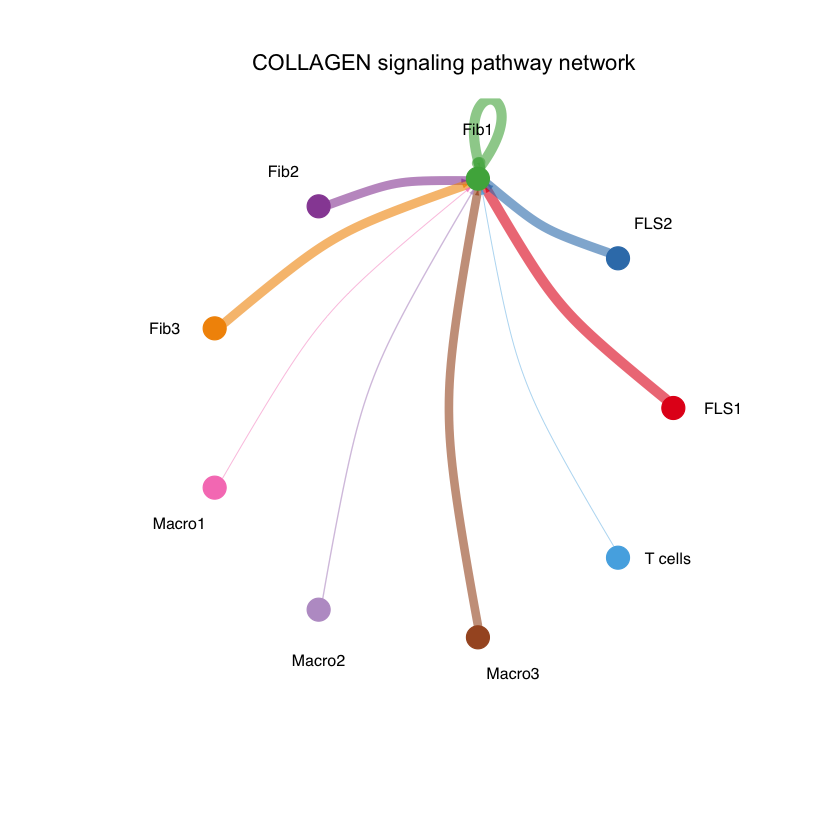

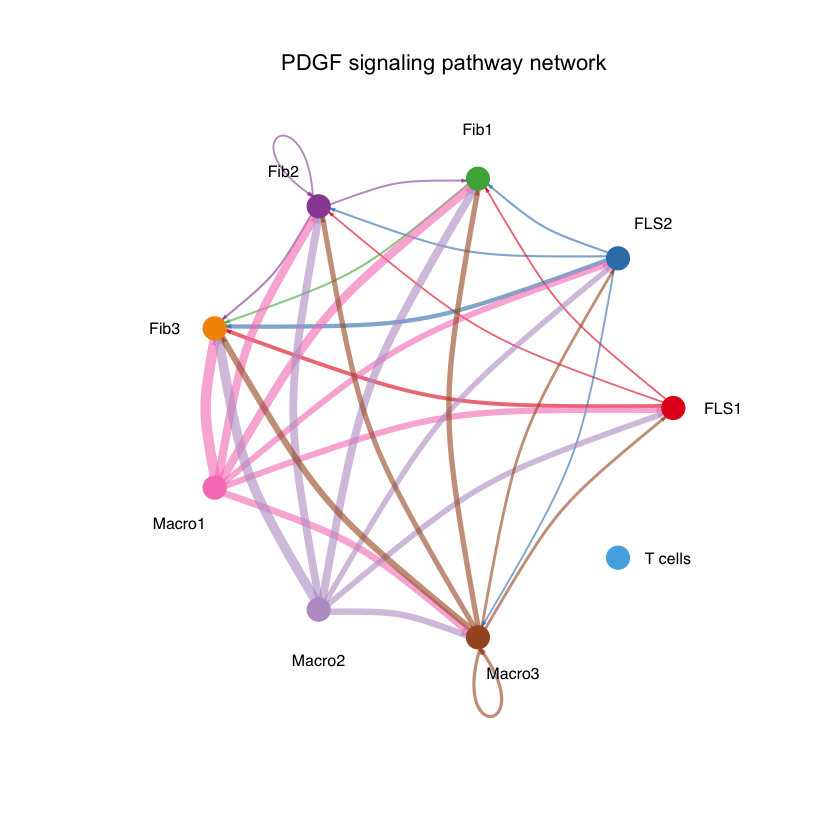

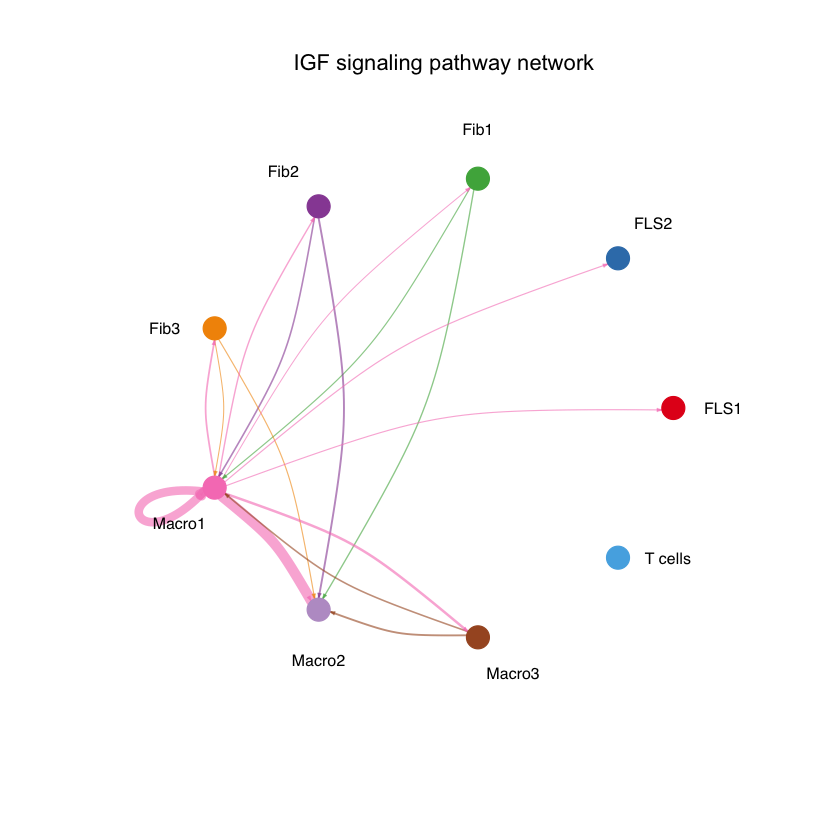

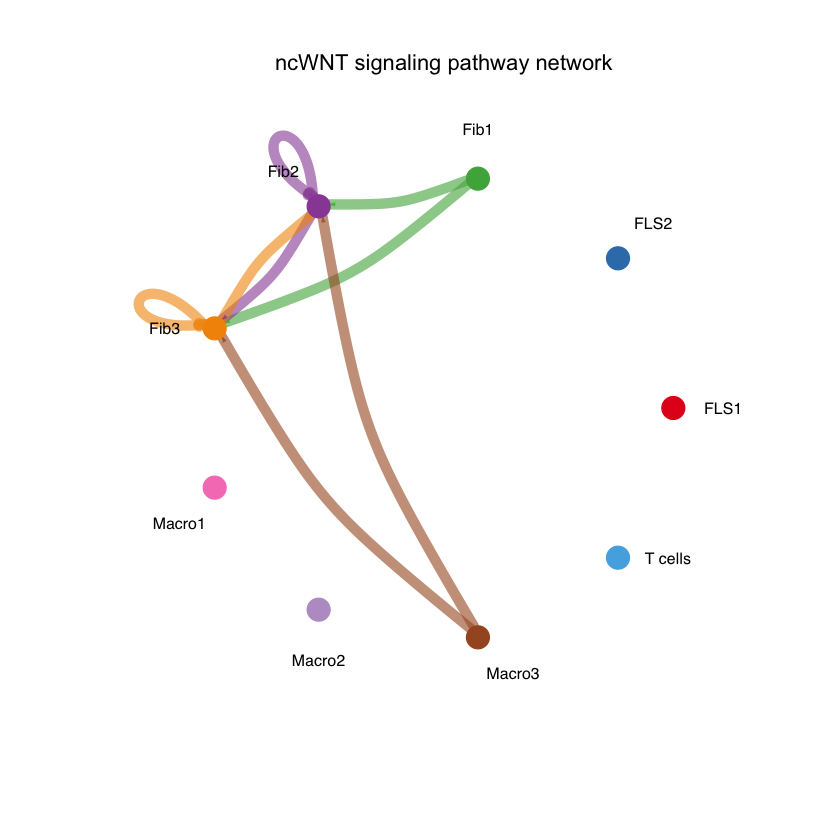

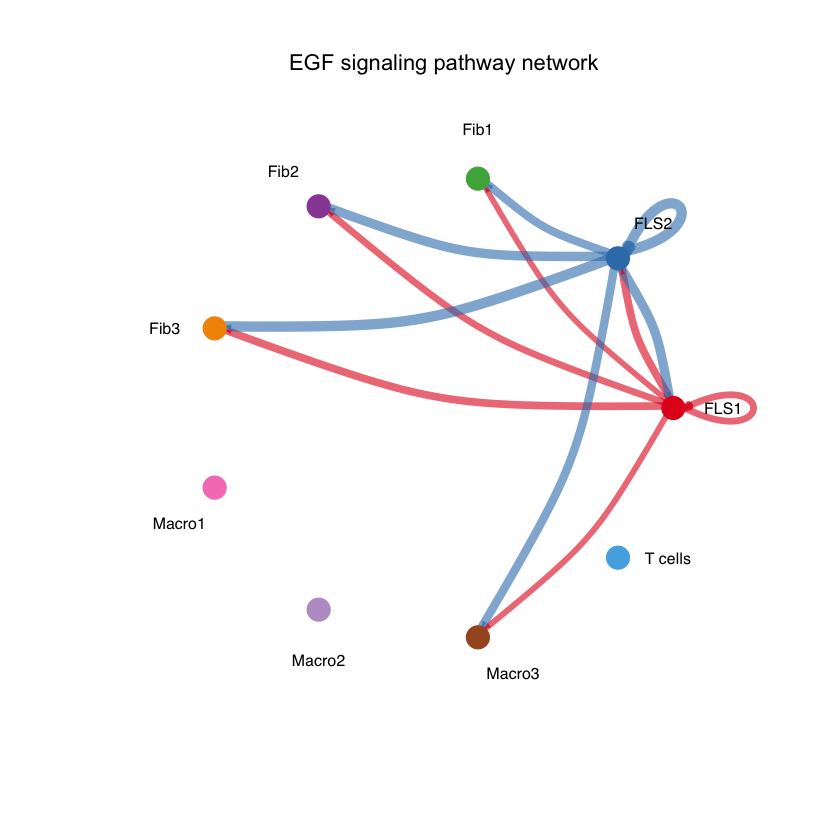

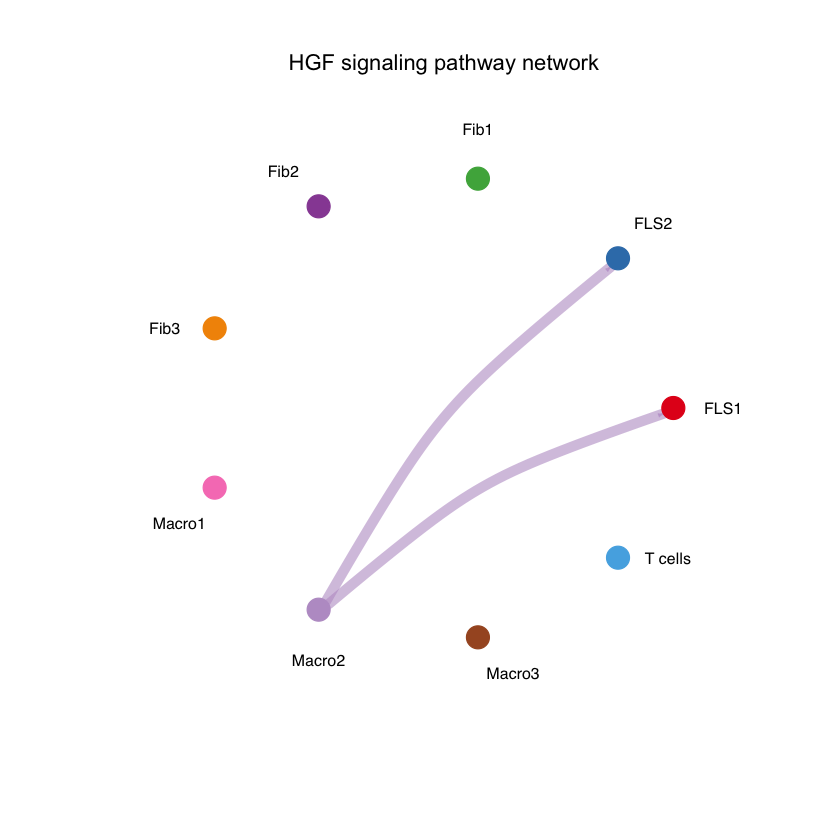

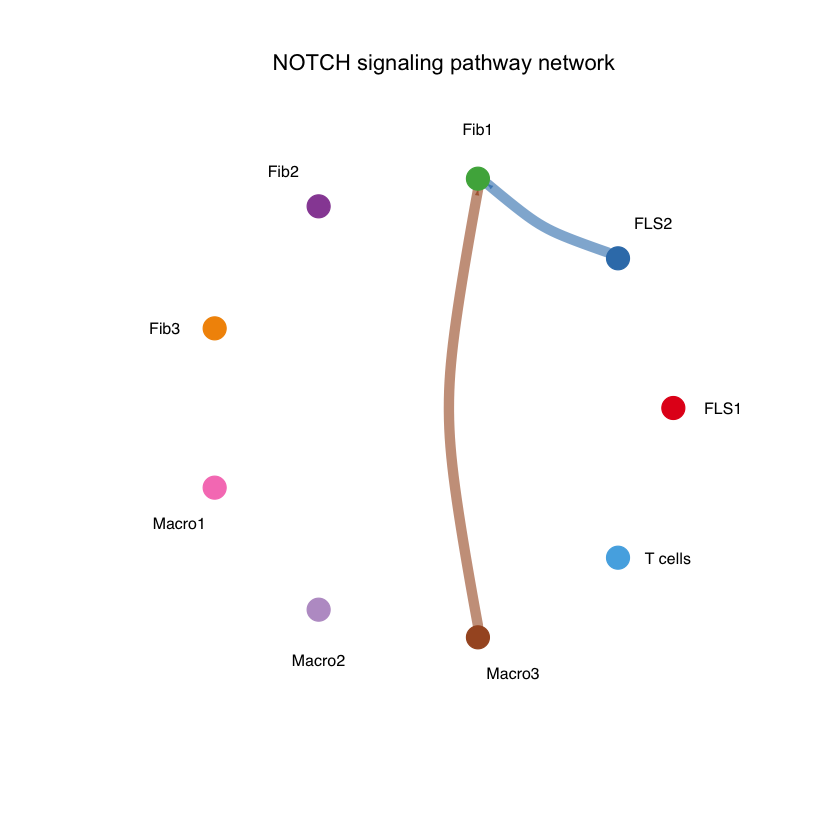

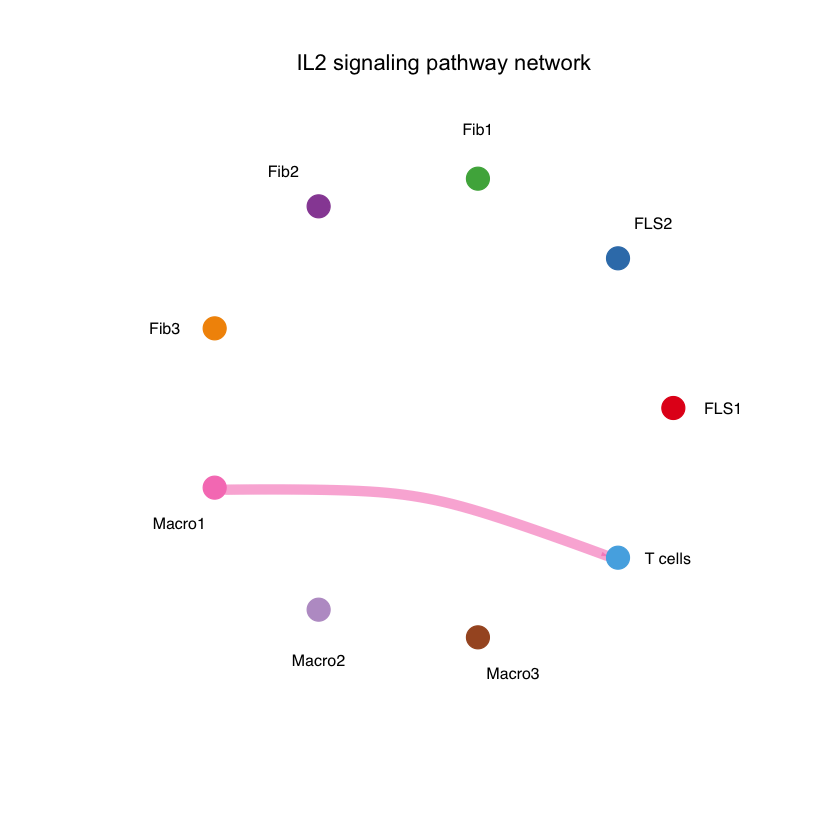

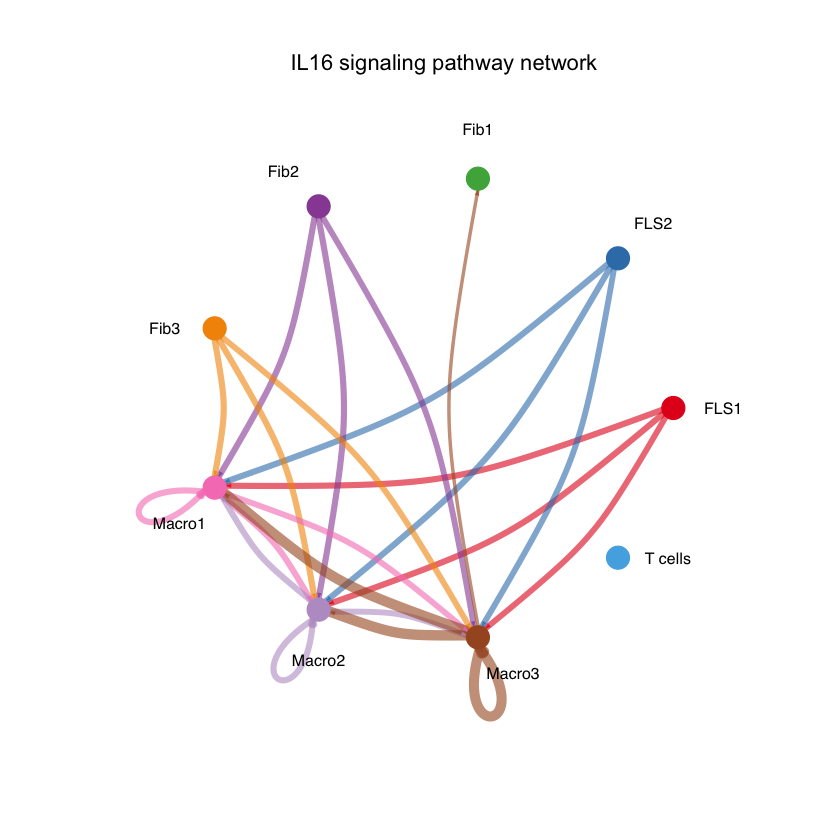

In [25]:
# pathways.show <- cellchat@netP$pathways
pathways.show <- c('COLLAGEN', 'PDGF', 'IGF', 'ncWNT', 'EGF','HGF', 'NOTCH','IL2','IL16','CXCL')
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
for (val in pathways.show){
    vertex.receiver = seq(1,4) # a numeric vector. 
    # Circle plot
    par(mfrow=c(1,1))
#     pdf(paste('./figures/cellchat/', val,'_circle.pdf', sep = ''))
    netVisual_aggregate(cellchat, signaling = val, layout = "circle")
#     dev.off()
    }

In [ ]:
for( val in pathways.show){
    pdf(paste('./figures/cellchat/', val,'_chord.pdf', sep = ''), width = 10, height = 10)
    netVisual_aggregate(cellchat, signaling =val, layout = "chord", vertex.label.cex = 01)
    dev.off()
    }

In [ ]:
# val = 'ncWNT'
# pdf(paste('./figures/cellchat/', val,'_heatmap.pdf', sep = ''), width = 10, height = 10)
# #     netVisual_heatmap(cellchat, signaling = val, color.heatmap = "Reds")
# netVisual_heatmap(cellchat, signaling = val, color.heatmap = "Reds")
# dev.off()

In [ ]:
pathways.show <- c('COLLAGEN', 'PDGF', 'IGF', 'ncWNT', 'EGF','HGF', 'NOTCH','IL2','IL16')
for( val in pathways.show){
    pdf(paste('./figures/cellchat/', val,'_heatmap.pdf', sep = ''), width = 10, height = 10)
#     netVisual_heatmap(cellchat, signaling = val, color.heatmap = "Reds")
    print(netVisual_heatmap(cellchat, signaling = val, color.heatmap = "Reds"))
    dev.off()
    }


In [469]:
pdf('./figures/cellchat/contribution.pdf')
netAnalysis_contribution(cellchat, signaling = pathways.show)
dev.off()

pdf 
  2

In [39]:
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
for (val in pathways.show){
    pdf(paste('./figures/cellchat/extract_interaction_of_', val,'_circle.pdf', sep = ''), width = 10,
       height=10)
    netVisual_individual(cellchat, signaling = val,  pairLR.use =pairLR.CXCL)
    dev.off()
    
   
}



# bubble

In [59]:
pdf('./figures/cellchat/bubble_plot.pdf',width = 15,height = 10)
netVisual_bubble(cellchat, remove.isolate = FALSE, title='Bubble plot',signaling = pathways.show)
dev.off()

Comparing communications on a single object 




pdf 
  2

# chord

In [63]:
fib_marker = c('LUM','IGFBP6', 'COL1A1','ASPN', 'FBLN1', 'THY1') # Fibroblasts
macr_marker = c('MS4A6A', 'CD163', 'CD14', 'CYBB', 'CTSS') # Macrophages-m2
fib_syn_marker = c('CLIC5', 'HAS1', 'HBEGF') # Fibroblast-like Synoviocytes
end_marker = c('PTPRB', 'VWF', 'EMCN', 'ADGRL4') # Endothelial Cells
VSMC_marker = c('NOTCH3', 'ACTA2', 'TAGLN', 'TPM2') # Vascular Smooth Muscle Cells
TC_marker = c('CD2', 'CD3D') # T Cells
marker_genes = append(fib_syn_marker, fib_marker , macr_marker , TC_marker, end_marker , VSMC_marker)

ERROR: Error in append(fib_syn_marker, fib_marker, macr_marker, TC_marker, end_marker, : unused arguments (TC_marker, end_marker, VSMC_marker)


In [ ]:
pdf('./figures/cellchat/chord_plot.pdf',width = 20,height = 20)
netVisual_chord_gene(cellchat, signaling = pathways.show,)
dev.off()

In [ ]:
for(val in pathways.show){
    plotGeneExpression(cellchat, signaling =val)
    ggsave(paste('./figures/cellchat/' , val, '_geneExp.pdf', sep = ''))
}
    

In [19]:
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

In [26]:
pathways.show <- c('COLLAGEN', 'PDGF', 'IGF', 'ncWNT','TGFb','FGF','CSF','BMP','CXCL')

In [20]:
pathways.show <- c( 'FN1','MIF', 'TENASCIN','THY1','IGF' ,'NOTCH')

In [21]:
pathways.show <- c( 'ncWNT','MIF', 'TENASCIN','FGF' ,'TGFb')#lnn

In [22]:
cellchat@netP$pathways

[1] "COLLAGEN" "FN1"      "CD99"     "MHC-II"   "MIF"      "APP"     
 [7] "LAMININ"  "CD45"     "TENASCIN" "ANGPTL"   "THBS"     "PDGF"    
[13] "SEMA3"    "GAS"      "MK"       "THY1"     "CXCL"     "GALECTIN"
[19] "NEGR"     "CADM"     "TGFb"     "PTPRM"    "GRN"      "ADGRE5"  
[25] "IGF"      "PECAM1"   "MPZ"      "ANNEXIN"  "MHC-I"    "IL16"    
[31] "VISFATIN" "FGF"      "PROS"     "JAM"      "CSF"      "BMP"     
[37] "ITGB2"    "ICAM"     "EPHA"     "HSPG"     "NOTCH"    "CHEMERIN"
[43] "VCAM"     "CCL"      "CD46"     "ncWNT"    "TWEAK"    "WNT"     
[49] "NECTIN"   "EPHB"

In [23]:
for(val in pathways.show){
    pdf(paste('./figures/cellchat/',val, 'netAnalysis_signalingRole_network—af.pdf'),width = 5,height = 5)
    netAnalysis_signalingRole_network(cellchat, signaling = val, width = 8, height = 2.5, font.size = 10)
    dev.off()
}


In [48]:
write.table(cellchat@LR, file = './figures/cellchat/LR.csv',sep = ',')

In [56]:
pdf(paste('./figures/cellchat/',val, 'FGF.pdf'),width = 5,height = 5)
plotGeneExpression(cellchat, signaling = "FGF")
dev.off()

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


pdf 
  2

In [75]:
for(val in pathways.show){
#     pdf(paste('./figures/cellchat/',val, 'netAnalysis_signalingRole_scatter.pdf'),width = 5,height = 5)
    gg = netAnalysis_signalingRole_scatter(cellchat, signaling =val)
    ggsave(paste('./figures/cellchat/',val, 'netAnalysis_signalingRole_scatter.pdf'),width = 5,height = 5)
#     dev.off()
}



Signaling role analysis on the cell-cell communication network from user's input

Signaling role analysis on the cell-cell communication network from user's input

Signaling role analysis on the cell-cell communication network from user's input

Signaling role analysis on the cell-cell communication network from user's input

Signaling role analysis on the cell-cell communication network from user's input

Signaling role analysis on the cell-cell communication network from user's input

Signaling role analysis on the cell-cell communication network from user's input

Signaling role analysis on the cell-cell communication network from user's input

Signaling role analysis on the cell-cell communication network from user's input



In [77]:
pdf('./figures/cellchat/outgoing.pdf')
netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing",signaling = pathways.show)

dev.off()
pdf('./figures/cellchat/incoming.pdf')
netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming",signaling = pathways.show)

dev.off()

pdf 
  2

pdf 
  2

In [26]:
# pdf('./figures/cellchat/outgoing.pdf')
# par(mfrow = c(1,2))
# netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing")
# netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming")
# dev.off()

In [63]:
library(NMF)
library(ggalluvial)

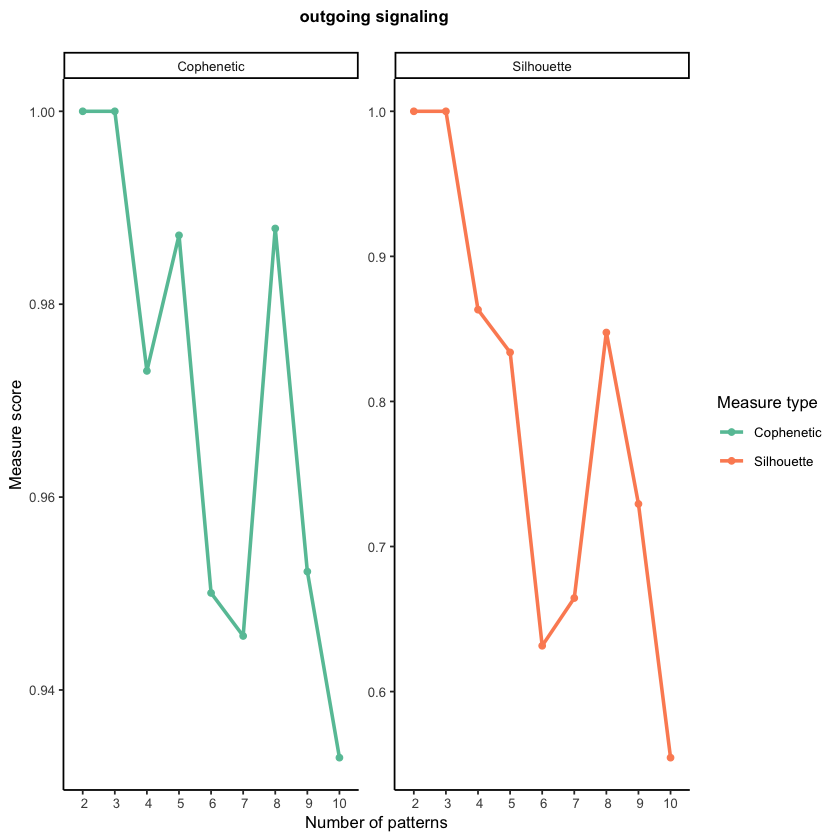

In [64]:
selectK(cellchat, pattern = "outgoing")
ggsave('./figures/cellchat/sk_outgoing.pdf',width = 5,height = 5)

In [66]:
nPatterns = 3
pdf('./figures/cellchat/outgoing-identifyCommunicationPatterns.pdf')
cellchat <- identifyCommunicationPatterns(cellchat, pattern = "outgoing", k = nPatterns)
dev.off()

pdf 
  2

In [67]:
pdf('./figures/cellchat/outgoing_river_plot.pdf')
netAnalysis_river(cellchat, pattern = "outgoing")
dev.off()

Please make sure you have load `library(ggalluvial)` when running this function



pdf 
  2

In [33]:
pdf('./figures/cellchat/outgoing_dot_plot.pdf')
netAnalysis_dot(cellchat, pattern = "outgoing")
dev.off()

pdf 
  2

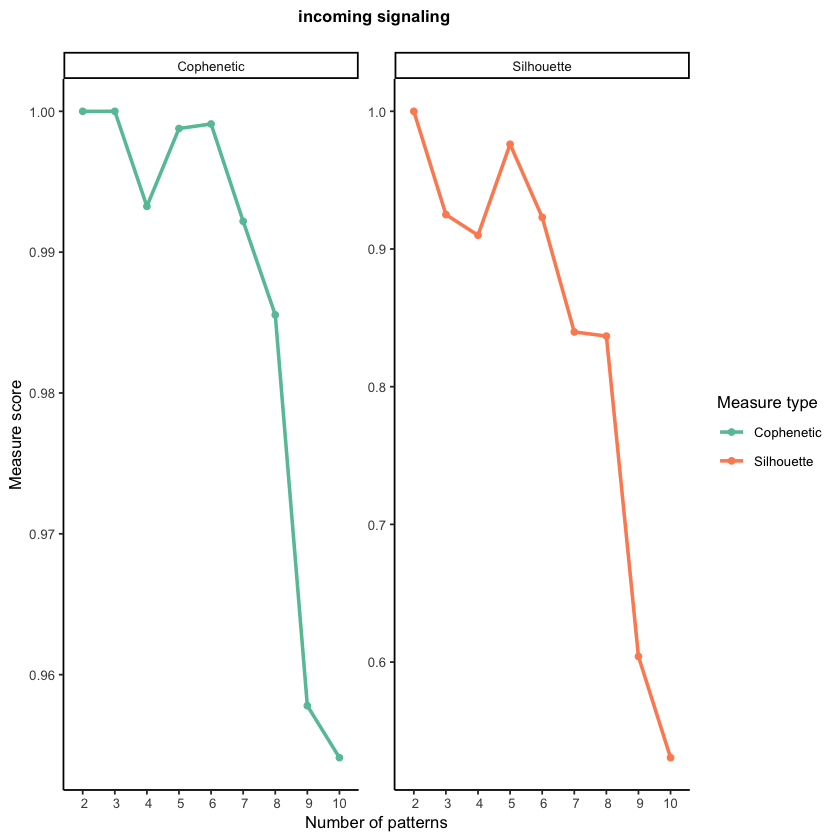

In [65]:
selectK(cellchat, pattern = "incoming")
ggsave('./figures/cellchat/sk_incoming.pdf',width = 5,height = 5)

In [68]:
nPatterns = 3
pdf('./figures/cellchat/imcoming-identifyCommunicationPatterns.pdf')
cellchat <- identifyCommunicationPatterns(cellchat, pattern = "incoming", k = nPatterns)
dev.off()


pdf 
  2

In [69]:
pdf('./figures/cellchat/incoming_river_plot.pdf')
netAnalysis_river(cellchat, pattern = "incoming")
dev.off()

Please make sure you have load `library(ggalluvial)` when running this function



pdf 
  2

In [70]:
pdf('./figures/cellchat/incoming_dot_plot.pdf')
netAnalysis_dot(cellchat, pattern = "incoming")
dev.off()

pdf 
  2

In [71]:
cellchat <- computeNetSimilarity(cellchat, type = "functional")
cellchat <- netEmbedding(cellchat, type = "functional")
#> Manifold learning of the signaling networks for a single dataset
cellchat <- netClustering(cellchat, type = "functional")
#> Classification learning of the signaling networks for a single dataset
# Visualization in 2D-space
pdf('./figures/cellchat/functional.pdf')
netVisual_embedding(cellchat, type = "functional", label.size = 3.5)
dev.off()

Manifold learning of the signaling networks for a single dataset 
Classification learning of the signaling networks for a single dataset 


pdf 
  2

In [72]:
cellchat <- computeNetSimilarity(cellchat, type = "structural")
cellchat <- netEmbedding(cellchat, type = "structural")
#> Manifold learning of the signaling networks for a single dataset
cellchat <- netClustering(cellchat, type = "structural")
#> Classification learning of the signaling networks for a single dataset
# Visualization in 2D-space
pdf('./figures/cellchat/structural.pdf')
netVisual_embedding(cellchat, type = "structural", label.size = 3.5)
dev.off()

Manifold learning of the signaling networks for a single dataset 
Classification learning of the signaling networks for a single dataset 


pdf 
  2

In [73]:
pdf('./figures/cellchat/structural_embeddingZoomIn.pdf')
netVisual_embeddingZoomIn(cellchat, type = "structural", nCol = 2)
dev.off()

pdf 
  2

In [40]:
saveRDS(cellchat, file = "../data/v3.rds")